In [313]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [314]:
import yfinance as yf
ticker="JPM"
df = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


In [315]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.000000,5.129630,5.018519,5.037037,1.178945,62775
1980-03-18,0.000000,5.111111,5.037037,5.074074,1.187613,64125
1980-03-19,0.000000,5.166667,5.111111,5.148148,1.204951,40500
1980-03-20,0.000000,5.148148,5.092593,5.111111,1.196282,18900
1980-03-21,0.000000,5.222222,5.111111,5.222222,1.222288,97200
...,...,...,...,...,...,...
2021-03-01,149.520004,151.380005,148.479996,150.500000,150.500000,14763300
2021-03-02,150.080002,151.779999,149.839996,150.009995,150.009995,14220300
2021-03-03,151.229996,154.979996,150.820007,152.910004,152.910004,14320300


In [316]:
df.reset_index(level=0, inplace=True)
df = pd.DataFrame(df, columns=['Date','Close'])
df.head()


,Date,Close
0,1980-03-17,5.037037
1,1980-03-18,5.074074
2,1980-03-19,5.148148
3,1980-03-20,5.111111
4,1980-03-21,5.222222


In [336]:
X, y = df.iloc[:,:-1],data.iloc[:,-1]


In [317]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [318]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [319]:
# Import package for linear model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [320]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [321]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
model = LinearRegression() 
model.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

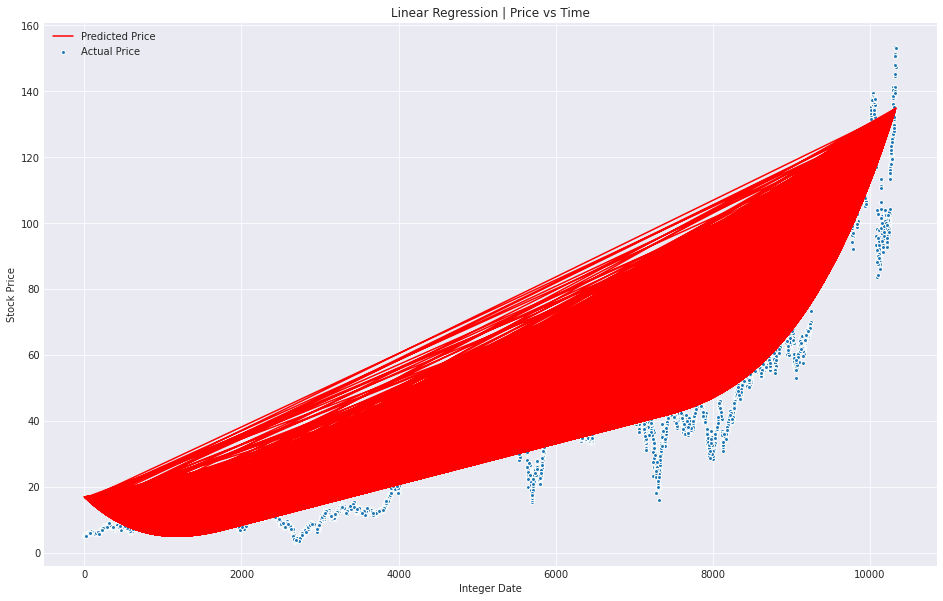

In [322]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(poly.fit_transform(X_train)), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [323]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [324]:
y_pred = model.predict(poly.fit_transform(X_test))

In [325]:
# Generate 25 random numbers
randints = np.random.randint(8000, size=30)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [326]:
df_sample.head()

,Date,Close
166,1980-11-11,6.000000
361,1981-08-20,7.925926
656,1982-10-20,9.250000
691,1982-12-09,9.388889
696,1982-12-16,8.888889


In [327]:
df_sample['Prediction'] = model.predict(poly.fit_transform(np.array(df_sample.index).reshape(-1, 1)))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


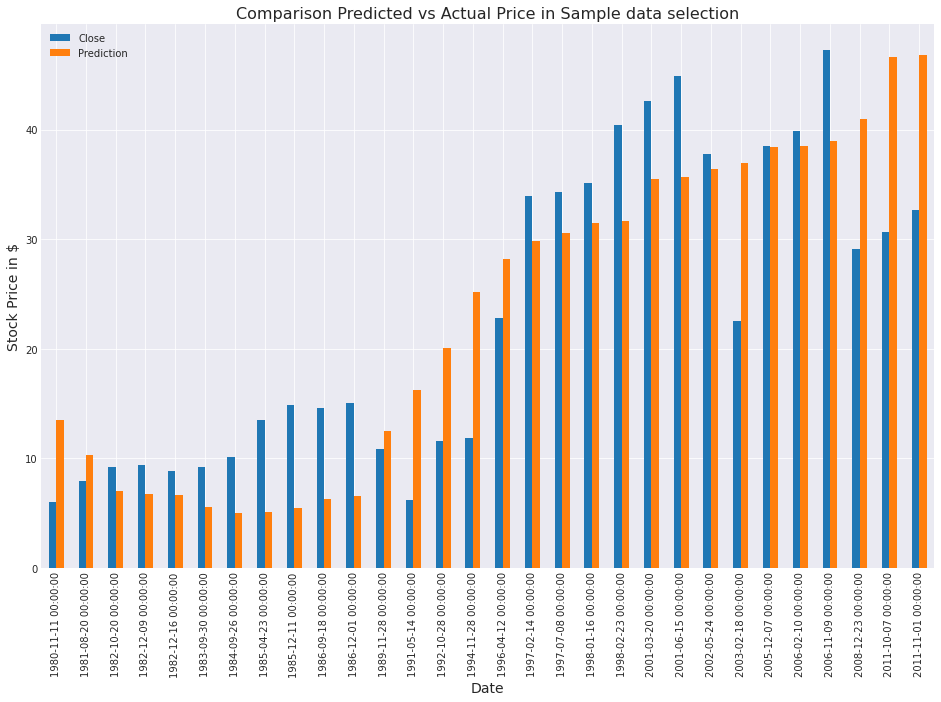

In [328]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

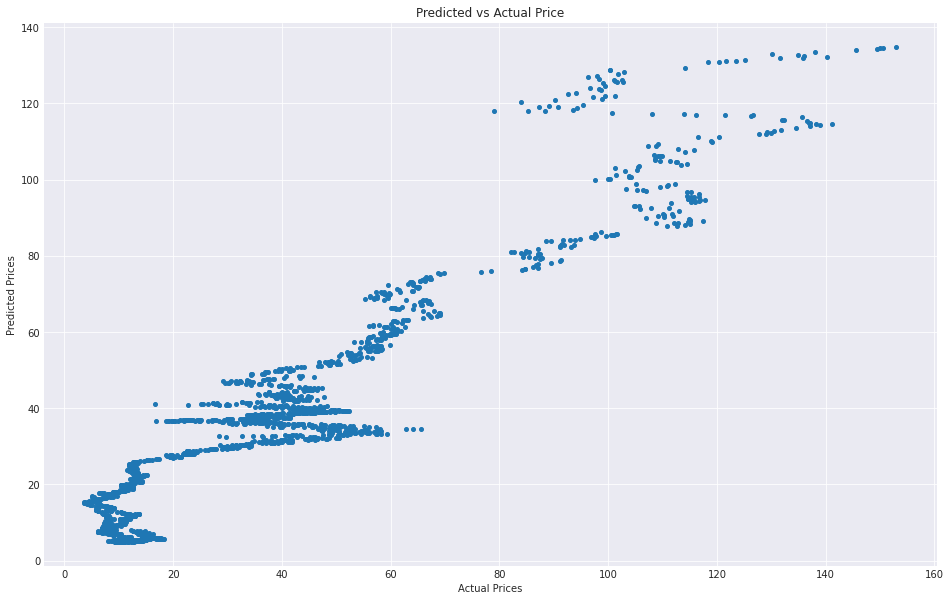

In [329]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


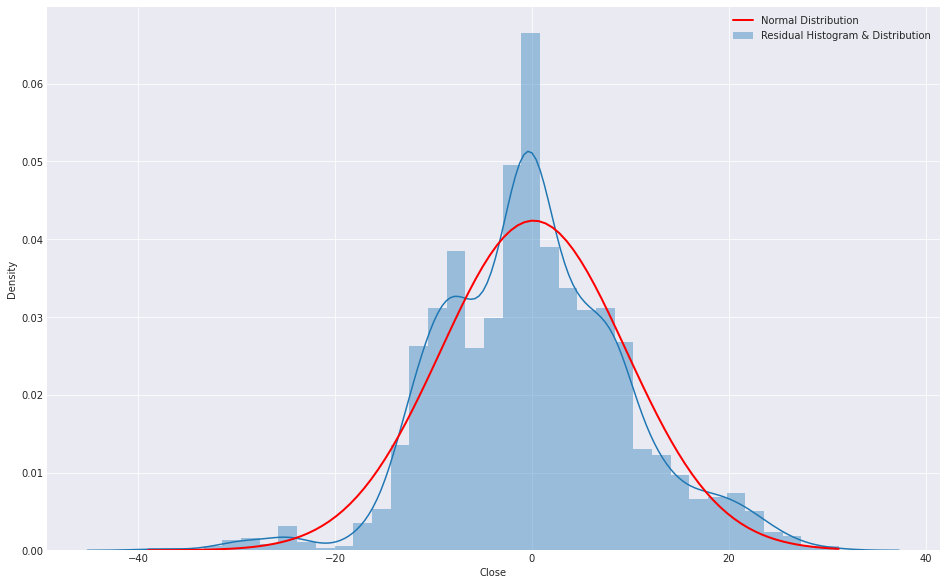

In [330]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [331]:
model.predict(poly.fit_transform(np.array([1700]).reshape(-1, 1)))

array([6.56054585])

In [332]:
from azureml.core.model import Model
from azureml.core import Workspace, Dataset


In [333]:
ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, ws.subscription_id, sep='\n')

pluralsightml
pluralsight
eastus2
156e1d11-a948-498e-940e-db60759b1f04


In [334]:
import joblib
name=str(ticker)+'_regression_model.pkl'

joblib.dump(model, name)

['JPM_regression_model.pkl']

In [335]:

model = Model.register(workspace=ws,
                       model_name=str(ticker)+'-model',                # Name of the registered model in your workspace.
                       model_path='./'+str(ticker)+'_regression_model.pkl',  # Local file to upload and register as a model.
                       model_framework=Model.Framework.SCIKITLEARN,  # Framework used to create the model.
                       
                       )

print('Name:', model.name)
print('Version:', model.version)

Registering model JPM-model
Name: JPM-model
Version: 1
